Calorie Burnt Prediction

Importing the Modules

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


Data Collection & Processing

In [68]:
#Loading the data from csv file to a Pandas DataFrame

calories = pd.read_csv('/content/calories.csv')

In [69]:
#Print the first 5 rows of the dataframe

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [70]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [71]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [72]:
calories_ex= pd.concat([exercise_data, calories['Calories']], axis=1)

In [73]:
calories_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [74]:
#Checking the number of rows and columns

calories_ex.shape

(15000, 9)

In [75]:
#Getting some informations about the data

calories_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Analysis

In [76]:
#Get some statistical measures about the data

calories_ex.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [77]:
sns.set()

<ipython-input-78-4f3f6325efcc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_ex['Age'])


<Axes: xlabel='Age', ylabel='Density'>

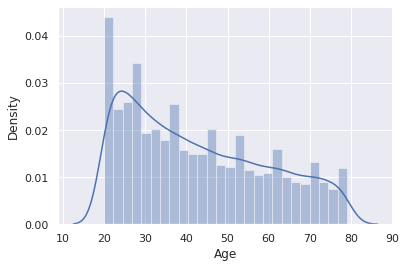

In [78]:
#Finding the distribution of "Age" column

sns.distplot(calories_ex['Age'])

<ipython-input-79-b52205528459>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_ex['Height'])


<Axes: xlabel='Height', ylabel='Density'>

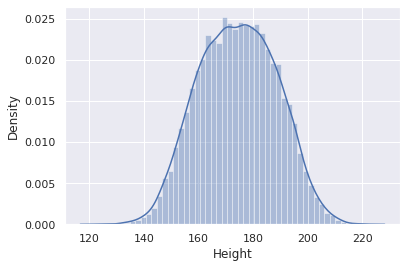

In [79]:
#Finding the distribution of "Height" column

sns.distplot(calories_ex['Height'])

<ipython-input-80-e46b4dbd523a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_ex['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

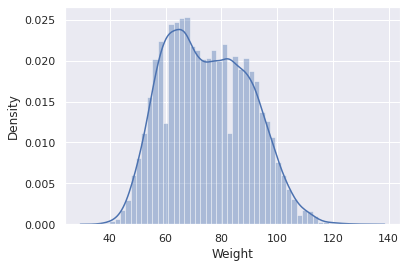

In [80]:
#Finding the distribution of "Weight" column

sns.distplot(calories_ex['Weight'])

<Axes: xlabel='Gender', ylabel='Count'>

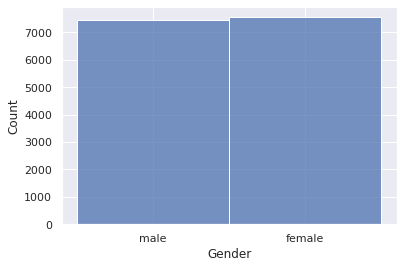

In [81]:
#Plotting the gender column in histplot

sns.histplot(calories_ex['Gender'])

Finding the Correlation in the dataset

In [82]:
correlation = calories_ex.corr()

<Axes: >

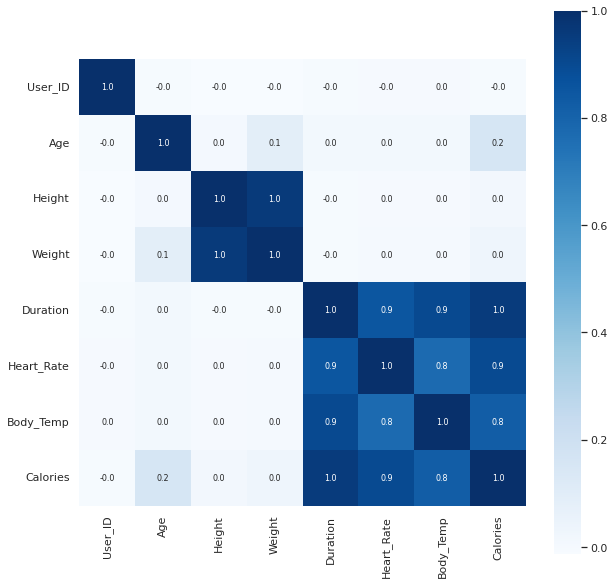

In [83]:
#Constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Converting the text data to numerical values

In [84]:
calories_ex.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [85]:
calories_ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [86]:
X= calories_ex.drop(columns=['User_ID','Calories'], axis=1)
Y= calories_ex['Calories']
print(X)
print(Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

Splitting the data into training data and Test data

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape,Y.shape,X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(15000, 7) (15000,) (12000, 7) (3000, 7) (12000,) (3000,)


Model-1 Training

**XGBoost Regressor**

In [88]:
# loading the model

model_1= XGBRegressor()
print(model_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


Evaluation on Train Data

In [89]:
#Training the model with X_train,Y_train

model_1.fit(X_train,Y_train)

#Calculatiing Training Score

score1=model_1.score(X_train,Y_train)*100
print('Training Score is:',score1)


Training Score is: 99.95517443430838


In [90]:
#Calculatiing Cross Validation Mean Score

cv_score1 = cross_val_score(model_1,X_train,Y_train,cv=10)
c1=cv_score1.mean()
print('Cross Validation Mean Score is:',c1)

Cross Validation Mean Score is: 0.9987431450430962



Evaluation & Prediction on Test Data
 

In [91]:
#Calculating Mean Square Error & Root Mean Square Error

ypred_xg=model_1.predict(X_test)
print(ypred_xg)

mse_1=mean_squared_error(Y_test,ypred_xg)
print('Mean Square Error  is:\n',mse_1)

mse_r1=mse_1*(1/2.0)
print('Root Mean Square Error  is:\n',mse_r1)


[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]
Mean Square Error  is:
 4.53426242569831
Root Mean Square Error  is:
 2.267131212849155


Compare the Actual Values and Predicted Values in a Plot

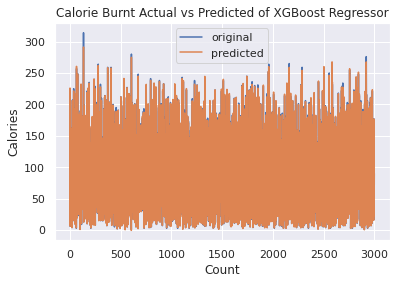

In [92]:
a_p=range(len(Y_test))
plt.plot(a_p,Y_test,label='original')
plt.plot(a_p,ypred_xg,label='predicted')
plt.title('Calorie Burnt Actual vs Predicted of XGBoost Regressor')
plt.xlabel('Count')
plt.ylabel('Calories')
plt.legend()
plt.show()


Model-2 Training

**RandomForest Regressor**

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
# loading the model

model_2=RandomForestRegressor(n_estimators=100, random_state=2)

In [95]:
# training the model with X_train,Y_train

model_2.fit(X_train,Y_train)

#Calculatiing Training Score

score2=model_2.score(X_train,Y_train)*100
print('Training Score is:',score2)


Training Score is: 99.96846721484614


In [96]:
#Calculatiing Cross Validation Mean Score

cv_score2 = cross_val_score(model_2,X_train,Y_train,cv=10)
c2=cv_score2.mean()
print('Cross Validation Mean Score is:',c2)

Cross Validation Mean Score is: 0.9976635564240353


Evaluation & Prediction on Test Data

In [97]:
#Calculating Mean Square Error & Root Mean Square Error

ypred_rf=model_2.predict(X_test)
print(ypred_rf)
mse_2=mean_squared_error(Y_test,ypred_rf)
print('Mean Square Error  is:\n',mse_2)
mse_r2=mse_2*(1/2.0)
print('Root Mean Square Error  is:\n',mse_r2)


[128.32 225.53  36.74 ... 144.75  23.8   90.12]
Mean Square Error  is:
 6.954200666666666
Root Mean Square Error  is:
 3.477100333333333


Compare the Actual Values and Predicted Values in a Plot

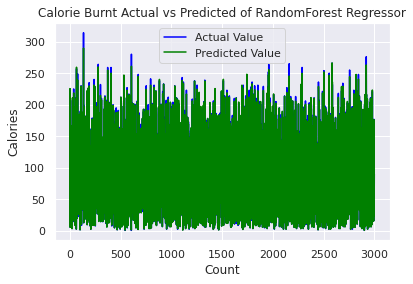

In [98]:
a_p=range(len(Y_test))
plt.plot(a_p,Y_test, color='blue', label = 'Actual Value')
plt.plot(a_p,ypred_rf, color='green', label='Predicted Value')
plt.title('Calorie Burnt Actual vs Predicted of RandomForest Regressor')
plt.xlabel('Count')
plt.ylabel('Calories')
plt.legend()
plt.show()

Model-3 Training

**Linear Regression**

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
# loading the model

model_3=LinearRegression()

In [101]:
# training the model with X_train,Y_train

model_3.fit(X_train,Y_train)

#Calculatiing Training Score

score3=model_3.score(X_train,Y_train)*100
print('Training Score is:',score3)

Training Score is: 96.72762198112508


In [102]:
#Calculatiing Cross Validation Mean Score

cv_score3 = cross_val_score(model_3,X_train,Y_train,cv=10)
c3=cv_score3.mean()
print('Cross Validation Mean Score is:',c3)

Cross Validation Mean Score is: 0.9672122944841035


In [103]:
#Calculating Mean Square Error & Root Mean Square Error

ypred_ln=model_2.predict(X_test)
print(ypred_ln)
mse_3=mean_squared_error(Y_test,ypred_ln)
print('Mean Square Error  is:\n',mse_3)
mse_r3=mse_3*(1/2.0)
print('Root Mean Square Error  is:\n',mse_r3)


[128.32 225.53  36.74 ... 144.75  23.8   90.12]
Mean Square Error  is:
 6.954200666666666
Root Mean Square Error  is:
 3.477100333333333


Compare the Actual Values and Predicted Values in a Plot

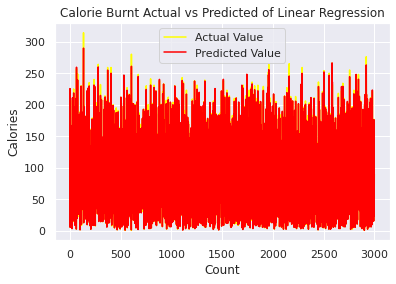

In [104]:
a_p=range(len(Y_test))
plt.plot(a_p,Y_test, color='yellow', label = 'Actual Value')
plt.plot(a_p,ypred_ln, color='red', label='Predicted Value')
plt.title('Calorie Burnt Actual vs Predicted of Linear Regression')
plt.xlabel('Count')
plt.ylabel('Calories')
plt.legend()
plt.show()

Model-4 Training

**KNeighbor Regressor**

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [106]:
# loading the model

model_4=KNeighborsRegressor(n_neighbors=5)

In [107]:
# training the model with X_train,Y_train

model_4.fit(X_train,Y_train)

#Calculatiing Training Score

score4=model_4.score(X_train,Y_train)*100
print('Training Score is:',score4)

Training Score is: 99.0970539148195


In [108]:
#Calculatiing Cross Validation Mean Score

cv_score4 = cross_val_score(model_4,X_train,Y_train,cv=10)
c4=cv_score4.mean()
print('Cross Validation Mean Score is:',cv_score4.mean())

Cross Validation Mean Score is: 0.9862598997092389


Evaluation & Prediction on Test Data

In [109]:
#Calculating Mean Square Error & Root Mean Square Error

ypred_kn=model_4.predict(X_test)
print(ypred_kn)
mse_4=mean_squared_error(Y_test,ypred_kn)
print('Mean Square Error  is:\n',mse_4)
mse_r4=mse_4*(1/2.0)
print('Root Mean Square Error  is:\n',mse_r4)

[126.2 237.   47.6 ... 148.4  22.4  82.2]
Mean Square Error  is:
 51.460813333333334
Root Mean Square Error  is:
 25.730406666666667


Compare the Actual Values and Predicted Values in a Plot

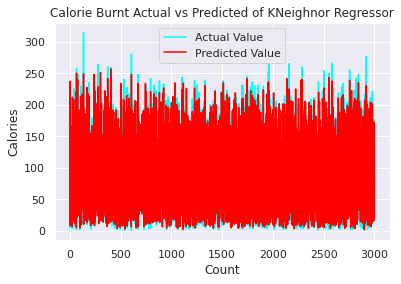

In [110]:
a_p=range(len(Y_test))
plt.plot(a_p,Y_test, color='cyan', label = 'Actual Value')
plt.plot(a_p,ypred_kn, color='red', label='Predicted Value')
plt.title('Calorie Burnt Actual vs Predicted of KNeighnor Regressor')
plt.xlabel('Count')
plt.ylabel('Calories')
plt.legend()
plt.show()

Model-5 Training

**Support Vector Regressor**

In [111]:
from sklearn.svm import SVR

In [112]:
# loading the model

model_5=SVR(kernel='rbf')

In [113]:
# training the model with X_train,Y_train

model_5.fit(X_train,Y_train)

#Calculatiing Training Score

score5=model_5.score(X_train,Y_train)*100
print('Training Score is:',score5)

Training Score is: 93.96209873895998


In [114]:
#Calculatiing Cross Validation Mean Score

cv_score5 = cross_val_score(model_5,X_train,Y_train,cv=10)
c5=cv_score5.mean()
print('Cross Validation Mean Score is:',c5)

Cross Validation Mean Score is: 0.9342191037681473


In [115]:
#Calculating Mean Square Error & Root Mean Square Error

ypred_svr=model_5.predict(X_test)
print(ypred_svr)
mse_5=mean_squared_error(Y_test,ypred_svr)
print('Mean Square Error  is:\n',mse_5)
mse_r5=mse_5*(1/2.0)
print('Root Mean Square Error  is:\n',mse_r5)

[123.04017365 173.117781    56.41704389 ... 138.00300555  22.00311932
  94.25110648]
Mean Square Error  is:
 243.29310231858554
Root Mean Square Error  is:
 121.64655115929277


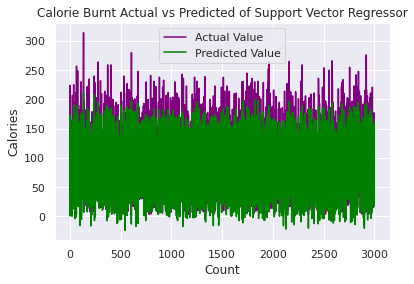

In [116]:
a_p=range(len(Y_test))
plt.plot(a_p,Y_test, color='purple', label = 'Actual Value')
plt.plot(a_p,ypred_svr, color='green', label='Predicted Value')
plt.title('Calorie Burnt Actual vs Predicted of Support Vector Regressor')
plt.xlabel('Count')
plt.ylabel('Calories')
plt.legend()
plt.show()

Model-6 Training

**DecisionTree Regressor**

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
# loading the model

model_6=DecisionTreeRegressor()

In [119]:
# training the model with X_train,Y_train

model_6.fit(X_train,Y_train)

#Calculatiing Training Score

score6=model_6.score(X_train,Y_train)*100
print('Training Score is:',score6)

Training Score is: 100.0


In [125]:
#Calculatiing Cross Validation Mean Score

cv_score6 = cross_val_score(model_6,X_train,Y_train,cv=10)
c6=cv_score6.mean()
print('Cross Validation Mean Score is:',c6)

Cross Validation Mean Score is: 0.992475879214228


In [121]:
#Calculating Mean Square Error & Root Mean Square Error

ypred_dc=model_6.predict(X_test)
print(ypred_dc)
mse_6=mean_squared_error(Y_test,ypred_dc)
print('Mean Square Error  is:\n',mse_6)
mse_r6=mse_6*(1/2.0)
print('Root Mean Square Error  is:\n',mse_r6)

[124. 220.  35. ... 154.  25.  91.]
Mean Square Error  is:
 27.503
Root Mean Square Error  is:
 13.7515


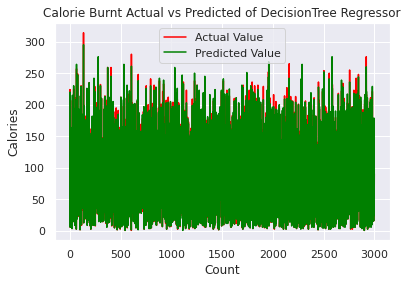

In [126]:
a_p=range(len(Y_test))
plt.plot(a_p,Y_test, color='red', label = 'Actual Value')
plt.plot(a_p,ypred_dc, color='green', label='Predicted Value')
plt.title('Calorie Burnt Actual vs Predicted of DecisionTree Regressor')
plt.xlabel('Count')
plt.ylabel('Calories')
plt.legend()
plt.show()

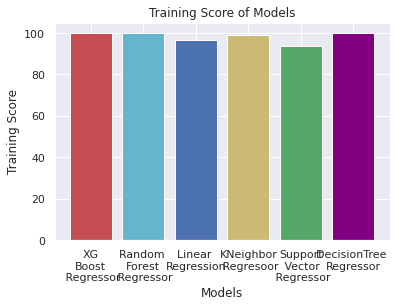

In [122]:
s_model=[score1,score2,score3,score4,score5,score6]
color_code = ['r','c','b','y','g','purple']
plt.bar(['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor'],s_model,color = color_code)
plt.title('Training Score of Models')
plt.xlabel('Models')
plt.ylabel('Training Score')
plt.show()

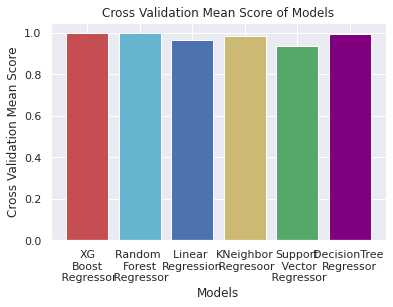

In [127]:
c_model=[c1,c2,c3,c4,c5,c6]
color_code = ['r','c','b','y','g','purple']
plt.bar(['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor'],c_model,color = color_code)
plt.title('Cross Validation Mean Score of Models')
plt.xlabel('Models')
plt.ylabel('Cross Validation Mean Score')
plt.show()

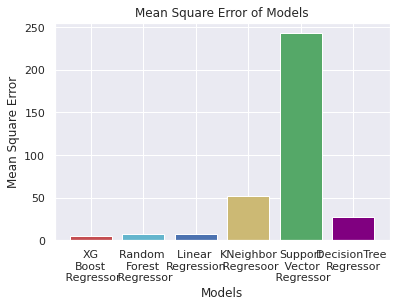

In [128]:
rmse_model=[mse_1,mse_2,mse_3,mse_4,mse_5,mse_6]
color_code = ['r','c','b','y','g','purple']
plt.bar(['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor'],rmse_model,color = color_code)
plt.title('Mean Square Error of Models')
plt.xlabel('Models')
plt.ylabel('Mean Square Error')
plt.show()


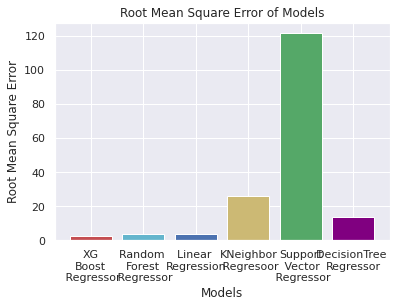

In [129]:
rmse_model=[mse_r1,mse_r2,mse_r3,mse_r4,mse_r5,mse_r6]
color_code = ['r','c','b','y','g','purple']
plt.bar(['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor'],rmse_model,color = color_code)
plt.title('Root Mean Square Error of Models')
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error')
plt.show()

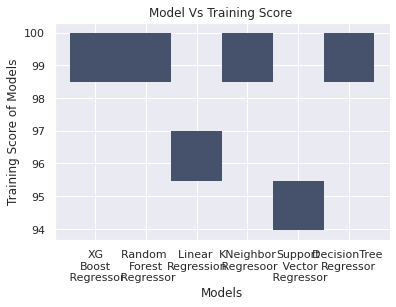

In [132]:
X_p=['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor']
Y_p=[score1,score2,score3,score4,score5,score6]
sns.histplot(x=X_p,y=Y_p)
plt.xlabel('Models')
plt.ylabel('Training Score of Models')
plt.title("Model Vs Training Score ")
plt.show()

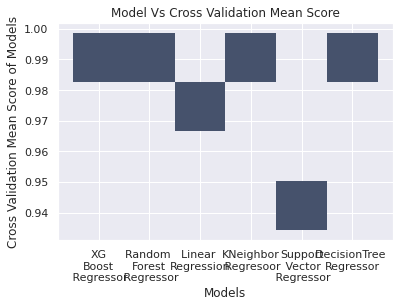

In [133]:
X_p=['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor']
Y_p=[c1,c2,c3,c4,c5,c6]
sns.histplot(x=X_p,y=Y_p)
plt.xlabel('Models')
plt.ylabel('Cross Validation Mean Score of Models')
plt.title("Model Vs Cross Validation Mean Score")
plt.show()

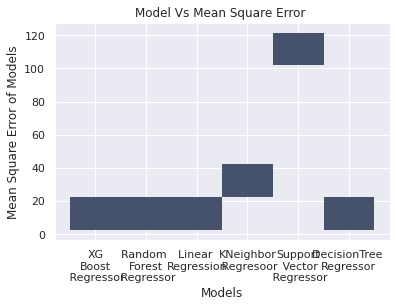

In [131]:
X_p=['XG\nBoost\n Regressor','Random \nForest\n Regressor','Linear \nRegression','KNeighbor\n Regresoor','Support\n Vector\n Regressor','DecisionTree \nRegressor']
Y_p=[mse_r1,mse_r2,mse_r3,mse_r4,mse_r5,mse_r6]
sns.histplot(x=X_p,y=Y_p)
plt.xlabel('Models')
plt.ylabel('Mean Square Error of Models')
plt.title("Model Vs Mean Square Error ")
plt.show()

**Conclusion**

Model-1

**XGBoost Regressor**

Mean Square Error  is **4.53426242569831**
 
Root Mean Square Error  is **2.267131212849155**
 
Training Score is **99.95517443430838**

Cross Validation Mean Score is: **0.9987431450430962**

Model-2

**RabdomForest Regressor**

Mean Square Error  is **6.954200666666666**

Root Mean Square Error  is **3.477100333333333**

Training Score is **99.96846721484614**

Cross Validation Mean Score is **0.9976635564240353**

Model-3

**Linear Regression**

Mean Square Error is **6.954200666666666**

Root Mean Square Error is  **3.477100333333333**

Training Score is **96.72762198112508**

Cross Validation Mean Score is **0.9672122944841035**

Model-4

**KNeighnor Regressor**

Mean Square Error is **51.460813333333334**

Root Mean Square Error is **25.730406666666667**

Training Score is **99.0970539148195**

Cross Validation Mean Score is **0.9862598997092389**

Model-5

**Support Vector Regressor**

Mean Square Error is **243.29310231858554**

Root Mean Square Error is **121.64655115929277**

Training Score is **93.96209873895998**

Cross Validation Mean Score is **0.9342191037681473**

Model-6

**Decision Tree Regressor**

Mean Square Error is **27.503**

Root Mean Square Error is **13.7515**

Training Score is **100.0**

Cross Validation Mean Score is **0.992475879214228**

When Comparing all Models Mean Square Error and Root Mean Square Error Values

Model-1 has less Mean Square Error Value and Root Mean Square Error Value

**Result:-**

Model-1

**XGBoost Regressor** fits correctly to this dataset

